<Figure size 640x480 with 0 Axes>

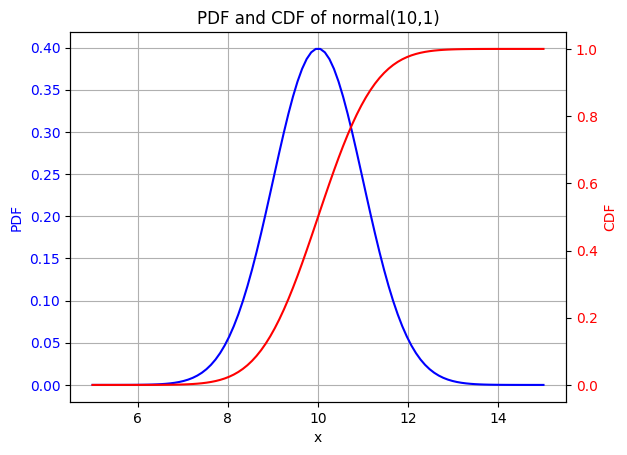

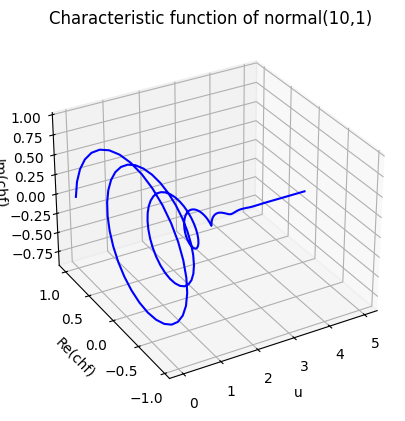

In [32]:
#%%
"""
Created on Thu Nov 28 2018
Characteristic function and density for normal(10,1)
@author: Lech A. Grzelak
"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

def plotNormalPDF_CDF_CHF():
    mu    = 10.0
    sigma = 1
    i     = complex(0,1)
    chf   = lambda u: np.exp(i * mu * u - sigma * sigma * u * u / 2.0)    ### exp(iuX) = exp(iu * mu + (iu)^2 * sigma^2 / 2)
    pdf   = lambda x: st.norm.pdf(x,mu,sigma)
    cdf   = lambda x: st.norm.cdf(x,mu,sigma)

    x = np.linspace(5,15,100)
    u = np.linspace(0,5,250)
                     
    # Figure 1, PDF and CDF on separate y-axes
    plt.figure(1)
    fig, ax1 = plt.subplots()
    ax1.set_title('PDF and CDF of normal(10,1)')

    ax1.plot(x, pdf(x), 'b-', label='PDF')
    ax1.set_xlabel('x')
    ax1.set_ylabel('PDF', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.grid()

    ax2 = ax1.twinx()  # Create a second y-axis
    ax2.plot(x, cdf(x), 'r-', label='CDF')
    ax2.set_ylabel('CDF', color='r')
    ax2.tick_params(axis='y', labelcolor='r')  


    # Figure 2, CHF

    plt.figure(3)
    ax = plt.axes(projection='3d')
    chfV = chf(u)
    
    x = np.real(chfV)
    y = np.imag(chfV)
    ax.plot3D(u, x, y, 'blue')
    ax.view_init(30, -120)
    ax.set_xlabel('u')
    ax.set_ylabel('Re(chf)')
    ax.set_zlabel('Im(chf)')
    ax.set_title('Characteristic function of normal(10,1)')

    plt.show()
    
plotNormalPDF_CDF_CHF()

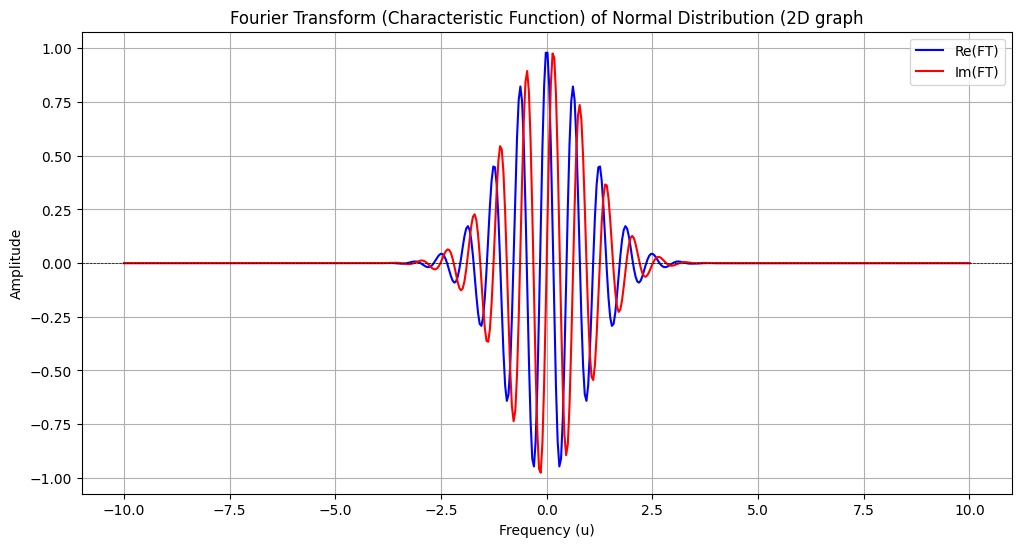

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def fourier_transform_normal():
    # Parameters of the normal distribution
    mu = 10  # Mean
    sigma = 1  # Standard deviation

    # Define the characteristic function of the normal distribution
    chf = lambda u: np.exp(1j * mu * u - 0.5 * (sigma ** 2) * (u ** 2))

    # Define the frequency range for the Fourier Transform
    u = np.linspace(-10, 10, 500)

    # Compute the characteristic function values
    chf_values = chf(u)

    # Plot the real and imaginary parts of the Fourier Transform
    plt.figure(figsize=(12, 6))
    plt.plot(u, np.real(chf_values), label="Re(FT)", color="blue")
    plt.plot(u, np.imag(chf_values), label="Im(FT)", color="red")
    plt.title("Fourier Transform (Characteristic Function) of Normal Distribution (2D graph")
    plt.xlabel("Frequency (u)")
    plt.ylabel("Amplitude")
    plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
    plt.legend()
    plt.grid()
    plt.show()

fourier_transform_normal()

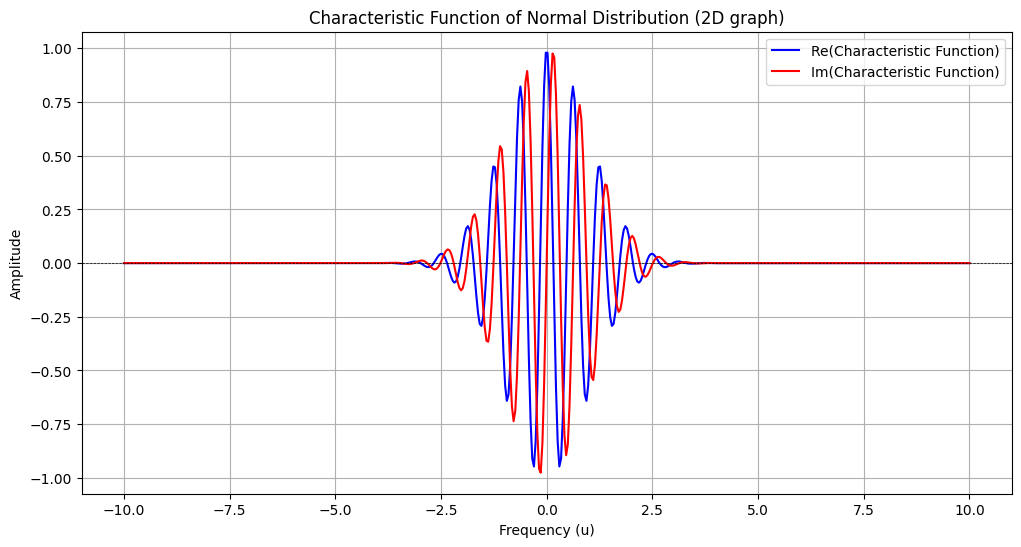

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def characteristic_function_normal(mu, sigma, u):
    """
    Characteristic function of a normal distribution.
    
    Parameters:
    mu (float): Mean of the normal distribution.
    sigma (float): Standard deviation of the normal distribution.
    u (array-like): Frequency values.
    
    Returns:
    array-like: Values of the characteristic function.
    """
    return np.exp(1j * mu * u - 0.5 * (sigma ** 2) * (u ** 2))

# Example usage
mu = 10  # Mean
sigma = 1  # Standard deviation
u = np.linspace(-10, 10, 500)  # Frequency range

# Compute the characteristic function
chf_values = characteristic_function_normal(mu, sigma, u)

# Plot the real and imaginary parts
plt.figure(figsize=(12, 6))
plt.plot(u, np.real(chf_values), label="Re(Characteristic Function)", color="blue")
plt.plot(u, np.imag(chf_values), label="Im(Characteristic Function)", color="red")
plt.title("Characteristic Function of Normal Distribution (2D graph)")
plt.xlabel("Frequency (u)")
plt.ylabel("Amplitude")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend()
plt.grid()
plt.show()

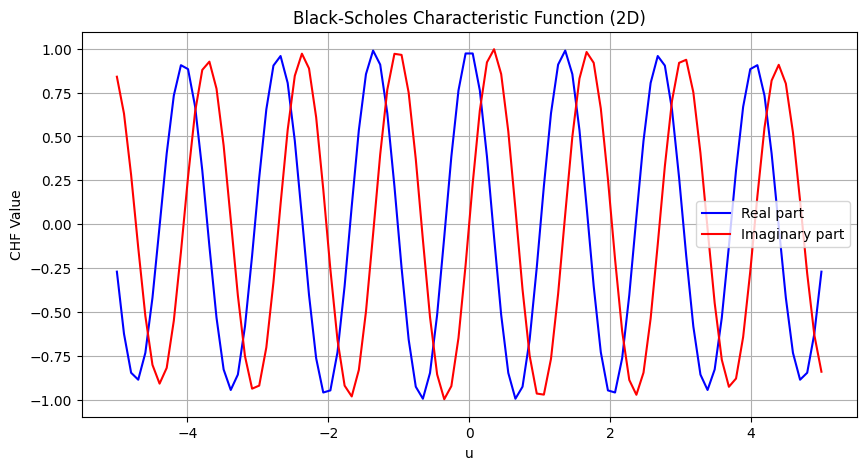

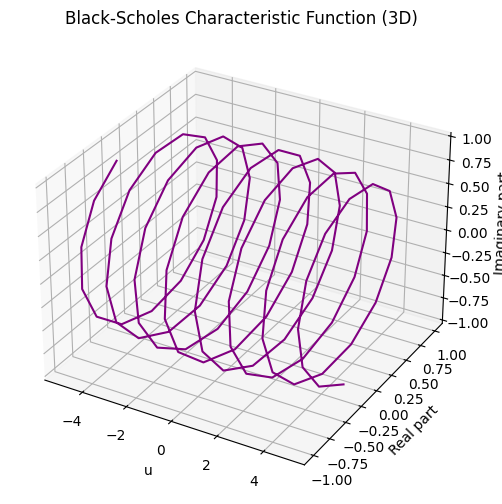

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
S0 = 100  # Initial asset price
mu = 0.05 # Drift
sigma = 0.1 # Volatility
t = 1  # Time horizon
u_values = np.linspace(-5, 5, 100)  # Range of u for characteristic function

# Characteristic function of X_t = log(S_t)
def black_scholes_chf(u, S0, mu, sigma, t):
    X0 = np.log(S0)
    return np.exp(1j * u * X0 + 1j * u * (mu - 0.5 * sigma**2) * t - 0.5 * (u**2) * sigma**2 * t)

# Compute CHF values
chf_vals = black_scholes_chf(u_values, S0, mu, sigma, t)

# 2D Plot of Real and Imaginary parts
plt.figure(figsize=(10, 5))
plt.plot(u_values, chf_vals.real, label="Real part", color='blue')
plt.plot(u_values, chf_vals.imag, label="Imaginary part", color='red')
plt.xlabel("u")
plt.ylabel("CHF Value")
plt.title("Black-Scholes Characteristic Function (2D)")
plt.legend()
plt.grid()
plt.show()

# 3D Plot of CHF (Real vs. Imaginary vs. u)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(u_values, chf_vals.real, chf_vals.imag, color='purple')
ax.set_xlabel("u")
ax.set_ylabel("Real part")
ax.set_zlabel("Imaginary part")
ax.set_title("Black-Scholes Characteristic Function (3D)")
plt.show()
